<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-make-it-aesthetic/blob/master/MakeItAesthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make it Aesthetic

# Table of Content
 1 Introduction
 
 2 Goals and Use Cases
  
 2.1 Our Goals

 2.2 Use Cases

 3 Theory and Methods
 
 4 Process
 
 5 Literature

# 1 Introduction

Photos are taken for various reasons.

Someone wants to document some situations, others want to keep their experience in memory. And someone takes photos because of art reasons. 

Almost everybody makes photos but not every photograph fulfills the criteria of an aesthetic photo. To change this we aim to be able to make every photo aesthetic. To reach this goal it is necessary to define the rules of an aesthetic photo and to define which object is the main object of the photo. These goals are described in the following chapter.



# 2 Goals and Use Cases
## 2.1 Goals
* make given images aesthetic

* selecting the guideline the image should follow

* Rule of Thirds

* Diagonal Dominance

* Visual Balance

* Golden Ratio

* by zooming and rotation the image

## 2.2 Use Cases
* making photos more aethstic for an photo album or for a website
  * vacation
    * sightseeing photos of buildings
    * nature photos of landscapes and detailed plants
  * wedding and over big events photos of people
  * art photos of detailed motives
* let the algorithms editing all your photos instead of doing it manually

# 3 Theory and Methods

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAJ7LcNQXUT0an5uu2FO_uclWl8MCq0wINJNh3oLrs-shr3_Hb5A)


Golden Ratio

![alt text](https://s14-eu5.startpage.com/cgi-bin/serveimage?url=https%3A%2F%2Fencrypted-tbn0.gstatic.com%2Fimages%3Fq%3Dtbn%3AANd9GcQDsh2JSGxEuiQueDxc8Nv3exWChiSh6WRxRrh_LeffSCXFbiysFA&sp=008dda95fde15b3ee8aea0de9351ca23&anticache=923965)


Diagonal Dominance

![alt text](https://ianfrithrn.files.wordpress.com/2012/05/reduced1.jpg)

#4 Process

In [0]:
import numpy as np
import cv2
from skimage import io
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

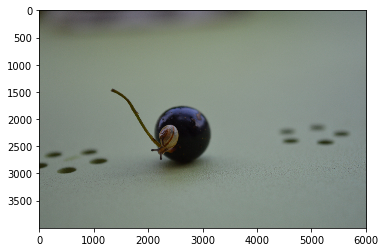

In [3]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/snail.JPG
img_snail = cv2.imread("snail.JPG")
img_snail = cv2.cvtColor(img_snail, cv2.COLOR_BGR2RGB)
plt.imshow(img_snail)

Now we can see the image. The next step is to find out the size of the image in the x-axis (width of image) and in the y-axis (height of image). That happens with the **shape** function.

Now we can divide the width with 512 and the height with 512 by 3 to calculate the positions for the lines of the **Rule of Thirds**.

Now we calculated the position of the first line in the height of the image. Because the height of the image is equal to the width we already calculated the line in the width of the image. The second line will be at the position 170.666 + 170.666 = 341.332.

Now we are able to draw the line into the image with the **cv2.line()** function. Therefore we have to know to points: For 

In this function the photo will be preprocessed in the sense that it determines the size of the image. Therefore we use the **shape**-function of *open CV*. To calculate the first line for the RT it divides the height (resp. the width) of the photo by 3. Therefore the "//" operator is used since we need integer values for the further processing. For the second horizontal line the height is divided by 3 too but now the result is multiplied by 2. Similarly for the vertical line.


In [0]:
def generate_image_data(img):
  height = img.shape[0]
  width = img.shape[1]

  #calulating the lines for the rule of thirds
  third_of_height_1 = height // 3
  third_of_height_2 = (height // 3) * 2
  third_of_width_1 = width // 3
  third_of_width_2 = (width // 3) * 2
  return third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2


The following function called **draw_rule_of_thirds** is used to draw the lines of the *Rule of Thirds* (RT) on the given photo. The function requireds an object of type *img*, the colour the lines should appear and the line width for the RT-lines. It returns an object of type *img*.

After the preprocessing in the **generate_image_data** function we have all information to draw the RT-lines. Therefore we use the **axhline**-function of *matplotlib* for the horizontal lines and similarly the **axvline**-function for the vertical lines. Since we have images with different colours we have to draw the RT-lines in black or white depending on the average colour of the picture. To determine the average colour we add up all pixels of the gray version of the image and divide the sum by total amount of pixels of the image matrix.

At the end the function returns the photo with the RT-lines on it. The RT-lines are shown in a different layer as the image is shown. Since we do not want to have the line in the image later on.


In [0]:
def draw_rule_of_thirds(img):
  #calulating the the height and width of the image and the lines for the rule of thirds
  third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 = generate_image_data(img)

  #calculating the average_brightness of the image
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  average_brightness = img_gray.sum() // (len(img_gray)*len(img_gray[0]))
 

  #define the line color in dependence of the brightness
  if average_brightness >= 129:
    #drawing the lines on the photo calculated above
    #drawing the horizontal lines
    plt.axhline(y = third_of_height_1, color = 'k')
    plt.axhline(y = third_of_height_2, color = 'k')
    #drawing the vertical lines
    plt.axvline(x = third_of_width_1, color = 'k')
    plt.axvline(x = third_of_width_2, color = 'k')
  else:
    #drawing the lines on the photo calculated above
    #drawing the horizontal lines
    plt.axhline(y = third_of_height_1, color = 'w')
    plt.axhline(y = third_of_height_2, color = 'w')
    #drawing the vertical lines
    plt.axvline(x = third_of_width_1, color = 'w')
    plt.axvline(x = third_of_width_2, color = 'w')
  return img

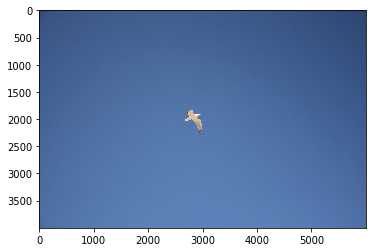

In [6]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/moewe.JPG
img_seagull = cv2.imread("moewe.JPG")
img_seagull = cv2.cvtColor(img_seagull, cv2.COLOR_BGR2RGB)
plt.imshow(img_seagull)

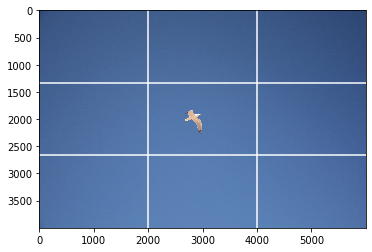

In [7]:
draw_rule_of_thirds(img_seagull)
plt.imshow(img_seagull)

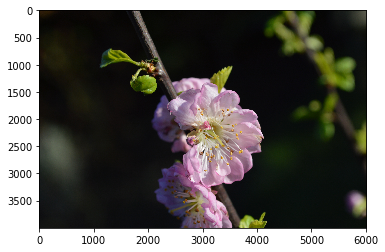

In [8]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/flower.JPEG
img = cv2.imread("flower.JPEG")
img_flower = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_flower)

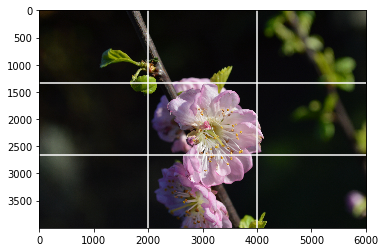

In [9]:
draw_rule_of_thirds(img_flower)
plt.imshow(img_flower)

### Calculation of the points of interests
Now we determine the **points of interest** by calculating the intersections of the lines.


In [0]:
def poi(img):
  third_of_height_1, third_of_height_2, third_of_width_1, third_of_width_2 =generate_image_data(img)

  poi1 = tuple([third_of_height_1, third_of_width_1])
  poi2 = tuple([third_of_height_1, third_of_width_2])
  poi3 = tuple([third_of_height_2, third_of_width_1])
  poi4 = tuple([third_of_height_2, third_of_width_2])

  print(poi1)
  print(poi2)
  print(poi3)
  print(poi4)

In [11]:
poi(img_snail)

(1333, 2005)
(1333, 4010)
(2666, 2005)
(2666, 4010)


### Detection of horizon

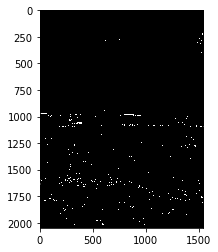

In [12]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/beach.jpeg
beach = cv2.imread("beach.jpeg")
beach = cv2.cvtColor(beach, cv2.COLOR_BGR2GRAY)
#plt.imshow(beach)

#beach_gray = cv2.cvtColor(beach, cv2.COLOR_RGB2GRAY)
#beach_blurred = cv2.bilateralFilter(beach,9,75,75)
#beach_blurred = cv2.GaussianBlur(beach, (5,5), 2)
beach_blurred = cv2.medianBlur(beach,5)
plt.imshow(beach_blurred, cmap='gray')

ret,thresh1 = cv2.threshold(beach_blurred,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = 'gray')

#laplacian = cv2.Laplacian(thresh1,cv2.CV_64F)
#plt.imshow(laplacian, 'gray')

#sobelx = cv2.Sobel(thresh1,cv2.CV_64F,1,0,ksize=5)
#plt.imshow(sobelx, 'gray')

edges = cv2.Canny(thresh1,100,200)
plt.imshow(edges, 'gray')


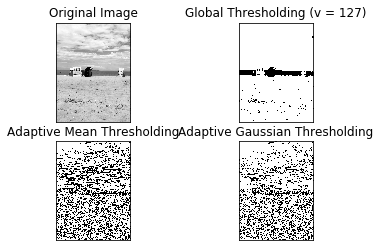

In [13]:
img = cv2.imread('beach.jpeg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,21,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,21,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Detect horizon (test by anna)

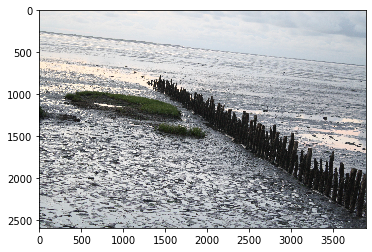

In [14]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-make-it-aesthetic/master/Pictures/beach_diagonal.jpg
beach_diagonal = cv2.imread("beach_diagonal.jpg")
beach_diagonal = cv2.cvtColor(beach_diagonal, cv2.COLOR_BGR2RGB)
plt.imshow(beach_diagonal)

<class 'NoneType'>


AttributeError: ignored

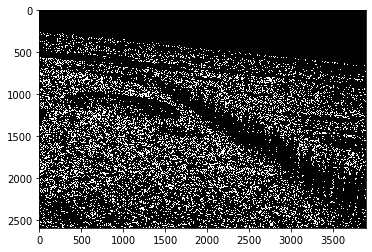

In [15]:
img = cv2.imread('beach_diagonal.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
plt.imshow(edges, 'gray')
minLineLength = 4000
#diagonale = np.sqrt(img.shape[0]**2 + img.shape[1]**2)
#print(diagonale)
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100, lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)
print(type(lines))
a,b,c = lines.shape
for i in range(a):
  cv2.lines(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
  cv2.imwrite('houghlines_beach_diagonal.jpg', gray)
  plt.imshow('houghlines_beach_diagonal.jpg', 'gray')
    #cos_theta = np.cos(theta)
    #sin_theta = np.sin(theta)
    #x0 = cos_theta*rho
    #y0 = sin_theta*rho
    #print(y0)
    #x1 = int(x0 + 1000*(-b))
    #y1 = int(y0 + 1000*(a))
    #x2 = int(x0 - 1000*(-b))
    #y2 = int(y0 - 1000*(a))

    #plt.plot(x0*a + y0*b)
#plt.show()


rho 604.0
theta 1.6755161
a -0.10452851
b 0.9945219
x0 -63.13522
y0 600.6912
x1 931
y1 496
x2 931
y2 705


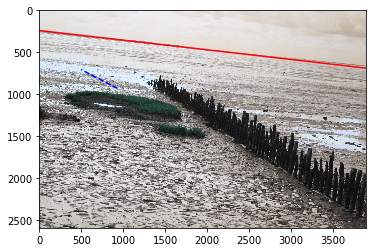

In [16]:
img = cv2.imread('beach_diagonal.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
#plt.imshow(edges, 'gray')
lines = cv2.HoughLines( edges,1,np.pi/180,1000)
for rho,theta in lines[0,:]:
    print('rho', rho)
    print('theta', theta)
    a = np.cos(theta)
    print('a', a)
    b = np.sin(theta)
    print('b', b)
    x0 = a*rho
    print('x0', x0)
    y0 = b*rho
    print('y0', y0)
    x1 = int(x0 + 1000*(b))
    print('x1', x1)
    y1 = int(y0 + 1000*(a))
    print('y1', y1)
    x2 = int(x0 - 1000*(-b))
    print('x2', x2)
    y2 = int(y0 - 1000*(a))
    print('y2', y2)

    #img_lines = cv2.line(img,(0,240),(4000,700),(255,0,0),10)
    plt.plot([0,4000], [240,700], color = 'r', linestyle = '-')
    plt.plot([x1,y1], [x2,y2], color='b', linestyle='--')

#cv2.imwrite('houghlines3.jpg',img_lines)
plt.imshow(img)


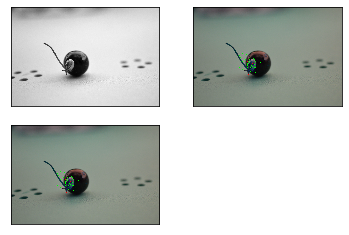

In [22]:
img = cv2.imread('snail.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
median = cv2.medianBlur(gray, 11)
plt.imshow(median, 'gray')

circles = cv2.HoughCircles(median, cv2.HOUGH_GRADIENT, 1, 30, param1=50, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  #draw the outer circle
  img_circle = cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
  #draw center of circle
  img_center = cv2.circle( img, (i[0], i[1]), 2, (255, 0, 0), 10)

images = [gray, img_circle, img_center]

for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(images[i], 'gray')
    #plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
#plt.imshow(img_circle)
#plt.imshow(img_center)


In [0]:
img = cv2.imread('beach_diagonal.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

#for i in range(4):
    #plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    #plt.title(titles[i])
    #plt.xticks([]),plt.yticks([])
plt.imshow(th3,'gray')

In [0]:
cv2.HoughLines(beach_diagonal, 30, 30,(2,1))
plt.imshow(beach_diagonal)

In [0]:
draw_rule_of_thirds(beach_diagonal)
plt.imshow(beach_diagonal)